HIPOTESIS EDA:

EN ESTE EDA SE QUIERE DEMOSTRAR QUE LAS POLITICAS DE IZQUIERDAS Y GLOBALISTAS, QUE SE REFLEJAN EN INDICADORES QUE SON CONSECUENCIA DE LA EMISION DESENFRENADA DE DEUDA, Y EL AUMENTO FISCAL TIENEN UN EFECTO NEGATIVO EN LOS VALORES ÉTICOS, SALUD TANTO FÍSICA Y MENTAL,
ADEMAS DE REPERCUTIR EN EL PRESTIGIO DADO POR LA CIUDADANIA ACTIVA AL LOBBY POLÍTICO Y ORGANISMOS QUE REPRESENTAN AL SISTEMA ,(Cuerpo policial, organismos internacionales, Eurodiputados, etc.)
EN ESTE CASO EL ESTUDIO SOLO SE CENTRARA EN LA EUROZONA. Y MAS DETALLADAMENTE EN SUBGRUPOS DE PAISES QUE TIENEN PARECIDOS EN LAS CARACTERISTICAS ECONOMICAS, CULTURALES Y CON CIERTA CERCANIA GEOGRAFICA.


EN RESUMEN SE DEMOSTRARA LA RELACION POSITIVA ENTRE LA INFLACION, EL BAJO SUELDO BRUTO MENSUAL MEDIO DEL PAIS Y CONDUCTAS NEGATIVAS PARA EL SISTEMA DE LA CIUDADANIA.

PLANTEAMIENTO:
Para ello haremos una división de nuestro dataset basandonos en la inflación, sueldo bruto mensual medio y pib per capita, para crear subgrupos que tengan similitudes socioeconomicas, compararemos los datos respecto a la Eurozona en general. Haremos un trabajo de etiquetación ademas de proponer varias variables de diferente campo semantico como targets.

Preparacion de datos:
Vamos a preparar los dataframes, descargandolos de la base de datos sql "database9k.db"

In [22]:
#1) Creacion de Subgrupos de paises:
import pandas as pd
from sqlalchemy import create_engine, text
import os
import sqlite3
#1.1 Nos conectamos a la base de datos.
database_path = os.path.abspath("C:/GitHubRepos/ProyectoFinal/data/processed/Dataset9k.db")
print(f"Database path: {database_path}")
conn = create_engine(f'sqlite:///{database_path}')
# Execute the SQL query, ya hemos visto en el visualizador de sql que los datos que deberian ser numericos hay algunas columnas que son formato texto, 
# hacemos un query para transformarlos justo antes de almacenarlos en un dataframe

#DF inflacion
query = """
SELECT País, REPLACE(Inflación, ',', '.') AS Inflación_Float
FROM EuroInfl
"""
#Creamos un diccionario para almacenar la conversion
dtype_dict = {'Inflación_Float': float}
# Load the DataFrame with the dtype dictionary
df_inf = pd.read_sql_query(query, conn, dtype=dtype_dict)
df_inf.drop_duplicates(subset='País', keep='first', inplace=True)

#DF PPC
query = f"""
SELECT País, ROUND(PPC) AS PPC_INTEGER
FROM EuroPPC
"""
df_PPC = pd.read_sql_query(query, conn)
df_PPC.drop_duplicates(subset='País', keep='first', inplace=True)
print(df_PPC)

#DF SBMM
query = """
SELECT País, REPLACE(SBMM, ',', '.') AS SBMM_Float
FROM EuroSBMM
"""
dtype_dict = {'SBMM': float}
df_SBMM = pd.read_sql_query(query, conn)
df_SBMM.drop_duplicates(subset='País', keep='first', inplace=True)
df_SBMM['País'] = df_SBMM['País'].str.strip().str.lower()

conn.dispose()
print(df_SBMM)


Database path: C:\GitHubRepos\ProyectoFinal\data\processed\Dataset9k.db
                  País  PPC_INTEGER
0        Unión Europea         41.0
1             Bulgaria         16.0
2              Rumania         18.0
3              Croacia         22.0
4              Polonia         22.0
5              Hungría         22.0
6              Letonia         23.0
7               Grecia         23.0
8   República Eslovaca         24.0
9             Portugal         27.0
10            Lituania         28.0
11             Estonia         30.0
12     República Checa         32.0
13           Eslovenia         33.0
14              España         34.0
15              Chipre         37.0
16              Italia         39.0
17               Malta         40.0
18             Francia         45.0
19           Finlandia         53.0
20            Alemania         54.0
21             Bélgica         55.0
22              Suecia         56.0
23             Austria         56.0
24        Países Bajos      

In [23]:
#No hay forma de cambiar la columna paises de la tabla SBMM, por lo que habra que realizar un diccionario de equivalencias para hacer coincidir la columna paises en los tres
#Dataframes de graficos, realizaremos posteriormente una clusterizacion para elegir 3 subgrupos de paises con economias similares y poder compararlos
#A nivel general con la Union Europea.
país_equivalencias = {
    'bulgaria :bg:': 'Bulgaria',
    'rumanía :ro:': 'Rumania',
    'hungría :hu:': 'Hungría',
    'croacia :hr:': 'Croacia',
    'polonia :pl:': 'Polonia',
    'letonia :lv:': 'Letonia',
    'eslovaquia :sk:': 'República Eslovaca',
    'grecia :gr:': 'Grecia',
    'lituania :lt:': 'Lituania',
    'estonia :ee:': 'Estonia',
    'portugal :pt:': 'Portugal',
    'república checa :cz:': 'República Checa',
    'malta :mt:': 'Malta',
    'chipre :cy:': 'Chipre',
    'eslovenia :si:': 'Eslovenia',
    'españa :es:': 'España',
    'italia :it:': 'Italia',
    'media ue :eu:': 'Unión Europea',
    'francia :fr:': 'Francia',
    'suecia :se:': 'Suecia',
    'finlandia :fi:': 'Finlandia',
    'austria :at:': 'Austria',
    'países bajos :nl:': 'Países Bajos',
    'bélgica :be:': 'Bélgica',
    'irlanda :ie:': 'Irlanda',
    'alemania :de:': 'Alemania',
    'dinamarca :dk:': 'Dinamarca',
    'luxemburgo :lu:': 'Luxemburgo',
}
df_SBMM['País'] = df_SBMM['País'].map(país_equivalencias)
print(df_SBMM)

                  País SBMM_Float
0           Luxemburgo       3713
1            Dinamarca       3573
2             Alemania       3148
3              Irlanda       3051
4              Bélgica       3007
5              Austria       2964
6         Países Bajos       2964
7            Finlandia       2678
8               Suecia       2604
9              Francia       2574
10       Unión Europea       2194
11              Italia       2174
12              España       1822
13           Eslovenia       1503
14              Chipre       1359
15               Malta       1354
16     República Checa       1208
17            Portugal       1154
18             Estonia       1123
19            Lituania       1110
20              Grecia       1049
21  República Eslovaca       1046
22             Letonia        978
23             Polonia        941
24             Croacia        903
25             Hungría        852
26             Rumania        796
27            Bulgaria        650


In [24]:
#Antes de la concatenacion de los dataframe hemos de hacer coincidir el tipo de datos, coincidir el index 

df_inf.reset_index(drop=True, inplace=True)
print(df_inf['País'].dtype)
print(df_inf['Inflación_Float'].dtype)
print(df_inf)

object
float64
                  País  Inflación_Float
0            Dinamarca             -3.8
1        Unión Europea              6.4
2           Luxemburgo              3.4
3              Irlanda              3.6
4               Chipre              3.8
5            Finlandia              3.9
6              Bélgica              4.5
7              Francia              5.3
8                Malta              5.3
9               Italia              5.8
10              Grecia              5.9
11            Alemania              6.1
12              Suecia              6.1
13              España              6.2
14             Letonia              6.4
15             Austria              6.6
16            Portugal              6.9
17        Países Bajos              7.3
18            Bulgaria              8.0
19             Estonia              8.1
20     República Checa              8.2
21            Lituania              9.0
22             Polonia              9.5
23           Eslovenia   

In [25]:
#df_PPC dtypes
df_PPC.reset_index(drop=True, inplace=True)
print(df_PPC['País'].dtype)
print(df_PPC['PPC_INTEGER'].dtype)

object
float64


In [26]:
#df_SBMM
df_SBMM.reset_index(drop=True, inplace=True)
print(df_SBMM['País'].dtype)
print(df_SBMM['SBMM_Float'].dtype)
#Aqui tenemos el problema, hemos de pasar la columna SBMM_FLoat a float64
df_SBMM['SBMM_Float'] = df_SBMM['SBMM_Float'].astype('float64')
print(df_SBMM['SBMM_Float'].dtype)

object
object
float64


In [27]:
#Preparamos el dataframe concatenado filtrando por valores unicos de paises y sus valores numericos en cada uno de los dataframes.
# Encontrar países comunes
paises_comunes = set(df_inf['País']).intersection(set(df_PPC['País']), set(df_SBMM['País']))

# Filtrar DataFrames para países comunes y establecer 'País' como índice
df_i1 = df_inf[df_inf['País'].isin(paises_comunes)].set_index('País')
df_P1 = df_PPC[df_PPC['País'].isin(paises_comunes)].set_index('País')
df_S1 = df_SBMM[df_SBMM['País'].isin(paises_comunes)].set_index('País')
# Concatenar los DataFrames por columnas
df_IPS = pd.concat([df_i1, df_P1, df_S1], axis=1)
#Eliminamos variables usadas que no son inutiles.
df_IPS.to_csv('C:/GitHubRepos/ProyectoFinal/data/processed/EuEco.csv', index=True)
del df_i1, df_P1, df_S1, df_inf, df_SBMM, df_PPC, país_equivalencias, dtype_dict, paises_comunes, df_IPS
df1= pd.read_csv('C:\GitHubRepos\ProyectoFinal\data\processed\EuEco.csv')
print(df1)


                  País  Inflación_Float  PPC_INTEGER  SBMM_Float
0            Dinamarca             -3.8         68.0      3573.0
1        Unión Europea              6.4         41.0      2194.0
2           Luxemburgo              3.4        129.0      3713.0
3              Irlanda              3.6        104.0      3051.0
4               Chipre              3.8         37.0      1359.0
5            Finlandia              3.9         53.0      2678.0
6              Bélgica              4.5         55.0      3007.0
7              Francia              5.3         45.0      2574.0
8                Malta              5.3         40.0      1354.0
9               Italia              5.8         39.0      2174.0
10              Grecia              5.9         23.0      1049.0
11            Alemania              6.1         54.0      3148.0
12              Suecia              6.1         56.0      2604.0
13              España              6.2         34.0      1822.0
14             Letonia   

<>:14: SyntaxWarning: invalid escape sequence '\G'
<>:14: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Josue\AppData\Local\Temp\ipykernel_9656\760774386.py:14: SyntaxWarning: invalid escape sequence '\G'
  df1= pd.read_csv('C:\GitHubRepos\ProyectoFinal\data\processed\EuEco.csv')


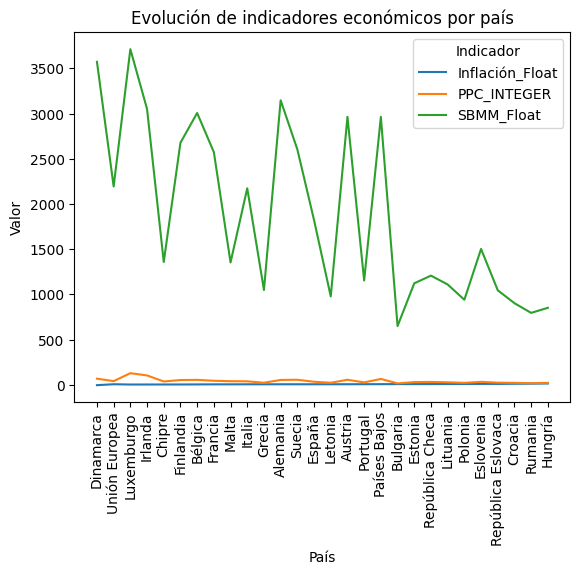

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1.set_index('País', inplace=True)
for column in ['Inflación_Float', 'PPC_INTEGER', 'SBMM_Float']:
    sns.lineplot(data=df1, x=df1.index, y=column, label=column)
# Personalizar el gráfico
plt.title('Evolución de indicadores económicos por país')
plt.xlabel('País')
plt.ylabel('Valor')
plt.legend(title='Indicador')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x si son muy largas

plt.show()




# Find countries present in all DataFrames
paises_inflacion = set(df_inf['País'])
paises_pib = set(df_PPC['País'])
paises_sueldo = set(df_SBMM['País'])

paises_comunes = paises_inflacion.intersection(paises_pib, paises_sueldo)

# Filter DataFrames for common countries
df_i1 = df_inf[df_inf['País'].isin(paises_comunes)]
df_P1 = df_PPC[df_PPC['País'].isin(paises_comunes)]
df_S1 = df_SBMM[df_SBMM['País'].isin(paises_comunes)]

# Concatenate the filtered DataFrames
df_IPS = pd.concat([df_i1, df_P1, df_S1], axis=1)
del df_i1, df_P1, df_S1, df_inf, df_SBMM, df_PPC, país_equivalencias, dtype_dict, paises_comunes, paises_inflacion, paises_pib, paises_sueldo

print(df_IPS) 

#1.5 Representacion Graficos Economicos.
import pandas as pd
import matplotlib.pyplot as plt

# Crear una grupo de graficos lineales con 3 subplots en una fila
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

# Graficar cada DataFrame en un subplot diferente
axes[0].plot(df_inf['País'], df_inf['Inflación_Float'])
axes[0].set_title('Inflacion Europa 2023')
axes[0].set_xlabel('Paises Euro')
axes[0].set_ylabel('Porcentaje')
axes[0].tick_params(axis='x', rotation=90)  


df_SBMM['SBMM_Float'] = pd.to_numeric(df_SBMM['SBMM_Float'].str.replace(',', '.'), errors='coerce')
df_SBMM = df_SBMM.dropna(subset=['SBMM_Float'])
df_SBMM = df_SBMM.sort_values(by='SBMM_Float')
axes[1].plot(df_SBMM['País'], df_SBMM['SBMM_Float'])
axes[1].set_title('Sueldo Bruto Mensual Medio')
axes[1].set_xlabel('Paises Euro')
axes[1].set_ylabel('Euros')
axes[1].set_ylim(ymin=0) 
axes[1].tick_params(axis='x', rotation=90)  

axes[2].plot(df_PPC['País'], df_PPC['PPC_INTEGER'])
axes[2].set_title('PIB Per Capita Anual')
axes[2].set_xlabel('Paises Euro')
axes[2].set_ylabel('Miles de Euros')
axes[2].set_ylim(ymin=0)  
axes[2].tick_params(axis='x', rotation=90)  

plt.tight_layout()
plt.show()